
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Nicolás González 

**Rol**: 201673544-5

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

## Cantidad de memoria

In [6]:
#Memoria utilizada

import sys
memory = digits.memory_usage() #Determinamos la cantidad de memoria por cada columna en bytes
total = (memory[1]*65)/1000 #Como todas las columnas tienen la misma cantidad de memoria multiplicamos por la cantidad
                            #de columnas que son 65 y dividimos por 1000 para dejar el dato en kilobyte
print(total, 'kilobytes')

467.22 kilobytes


## Tipo de datos

In [7]:
#Tipo de datos por columna

digits.dtypes

c00       int32
c01       int32
c02       int32
c03       int32
c04       int32
          ...  
c60       int32
c61       int32
c62       int32
c63       int32
target    int32
Length: 65, dtype: object

## Descripción del dataframe

In [8]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Distribución de los datos

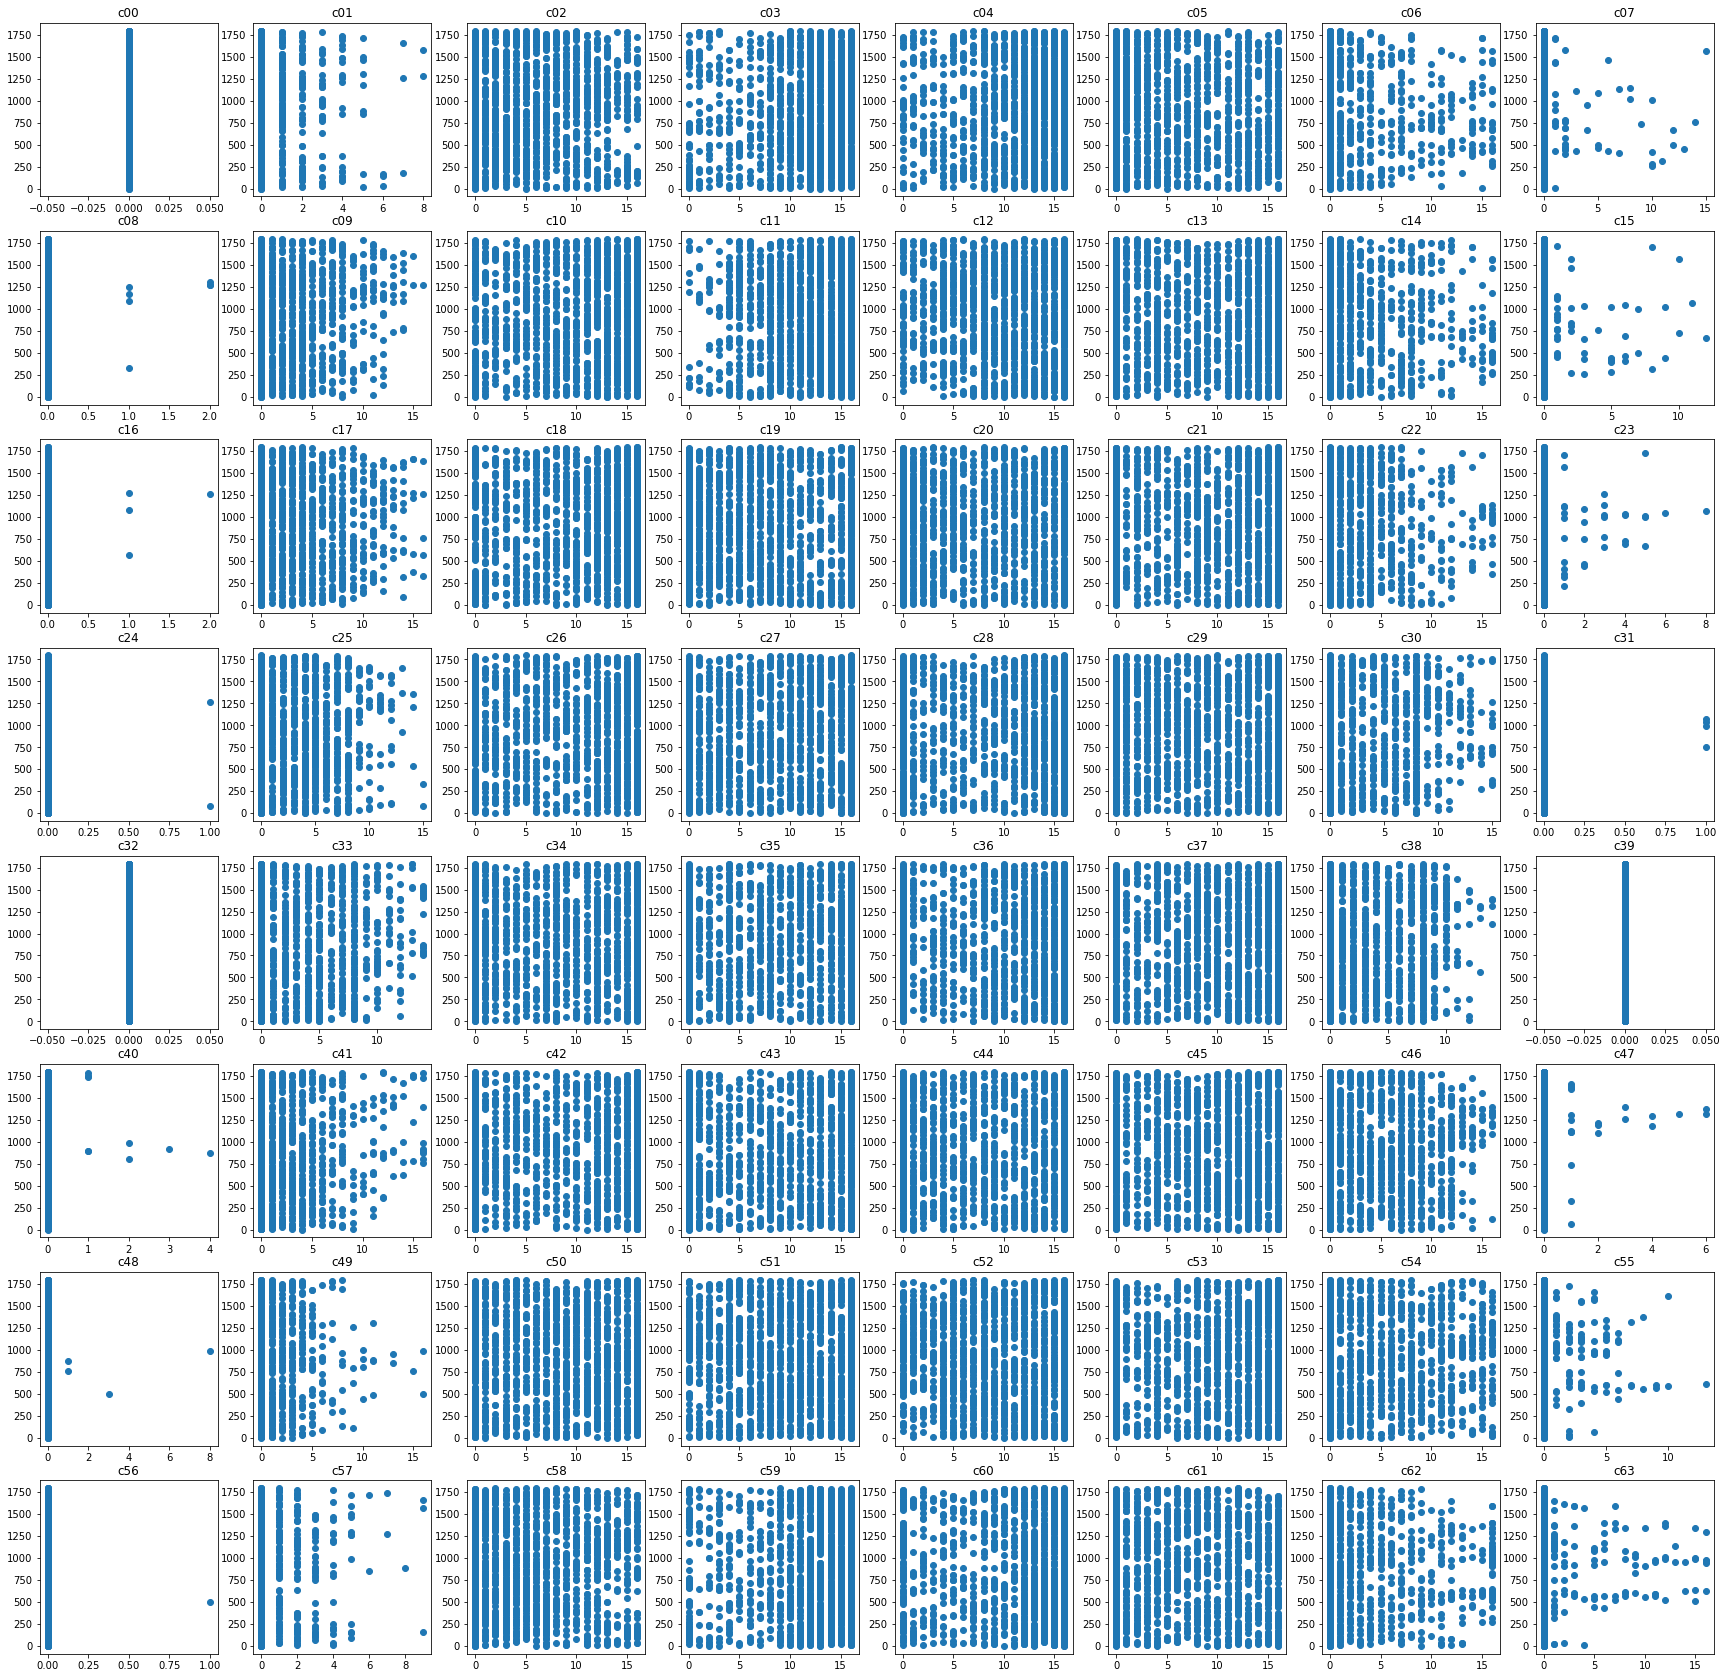

In [9]:
columnas = digits.columns
y = [i for i in range(len(digits))]
c = 0
fig = plt.figure(figsize = (30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.scatter(digits[columnas[i]], y)
    plt.title(columnas[i])

## Datos nulos

In [10]:
digits.isnull().values.any()

False

## Cantidad de registros por clase

In [11]:
pd.value_counts(digits.target)

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

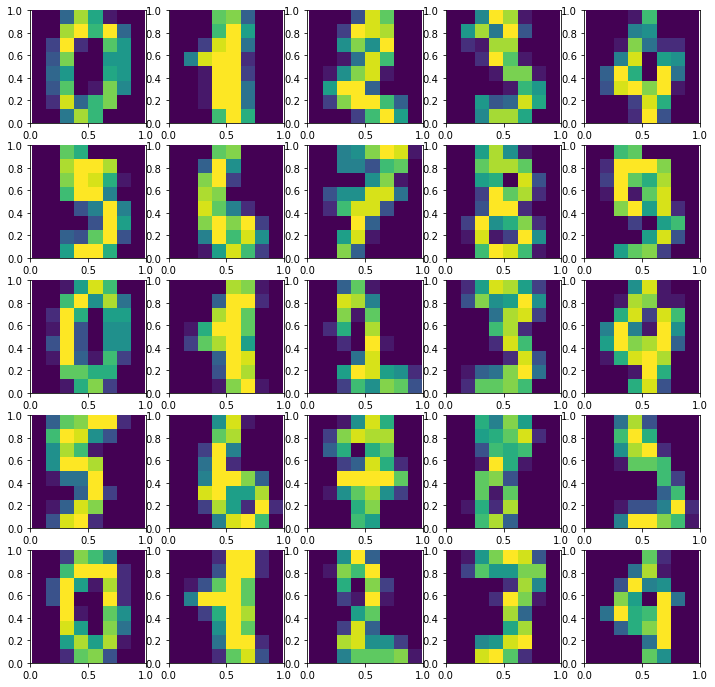

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
#Iteramos sobre los primeros 25 datos
for i in range(1, 26):
    img = digits_dict["images"][i-1]
    fig.add_subplot(5, 5, i)
    plt.imshow(img)
    plt.axis('off') #Tuve problemas con los ejes y con esto lo solucione
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [15]:
#Metricas entregadas en archivo de la tarea y en clases anteriores con unos ligeros cambios.

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
def summary_metrics(y_test,y_pred):
   
    # metrics

    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_test,y_pred))

    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_test, y_pred))
    print('recall:     ',recall_score(y_test, y_pred, average='macro'))
    print('precision:  ',precision_score(y_test, y_pred, average='macro'))
    print('f-score:    ',f1_score(y_test, y_pred, average='macro'))
    print("")


    return 

In [16]:
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1997)
#Imprimimos el conjunto de entrenamiento y testeo
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

numero de filas train set     :  1257
numero de filas test set      :  540


## Regresión Logística

In [17]:
#Modelo de Regresión logística usando GridsearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
metric_lr = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

lr = LogisticRegression()

lr_gridsearchcv = GridSearchCV(estimator = lr, param_grid = metric_lr, cv = 10)

start_time = time.time()#Cronometro

lr_grid_result = lr_gridsearchcv.fit(X_train, y_train)


print("--- %s segundos ---" % (time.time() - start_time))

--- 52.04821062088013 segundos ---


In [18]:
#Presentamos el mejor valor obtenido junto a los mejores hiperparametros
print("Mejor: %f usando %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))


Mejor: 0.965797 usando {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
#Calculo de métricas con matriz de confusión

y_pred = lr_gridsearchcv.predict(X_test)
summary_metrics(y_test,y_pred)


Matriz de confusion:
 
[[50  0  0  0  1  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  2  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  1  1  2]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  1  0  0 55  1  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 51  1  1]
 [ 0  1  0  1  0  0  0  0 48  0]
 [ 0  1  0  1  0  0  0  0  1 64]]

Metricas:
 
accuracy:    0.9666666666666667
recall:      0.9676235844176204
precision:   0.9678849788585003
f-score:     0.9675175358052035



Se observa que todas las métricas son aproximadamente 97%, por lo tanto el modelo tuvo el mismo desempeño para clasificar las clases positivos (de forma macro) y para clasificar las clases negativas (de forma macro)

## KNN

In [20]:
#Método K-Nearest Neighbours usando GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [3, 5, 11, 19],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)

start_time = time.time()#Cronometro

knn_grid_result = knn_gridsearchcv.fit(X_train, y_train)


print("--- %s segundos ---" % (time.time() - start_time))

--- 18.483806610107422 segundos ---


In [21]:
print("Mejor: %f usando %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))

Mejor: 0.986483 usando {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [22]:
#Calculo de métricas con la matriz de confusión

y_pred = knn_gridsearchcv.predict(X_test)
summary_metrics(y_test,y_pred)


Matriz de confusion:
 
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  1  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  1]
 [ 0  0  0  0  0  0  0  0 49  1]
 [ 0  1  0  1  0  0  0  0  2 63]]

Metricas:
 
accuracy:    0.9833333333333333
recall:      0.9847339981176442
precision:   0.9842113060204071
f-score:     0.9844122013917114



Misma conclusión anterior con la diferencia que los valores fueron del 98% y además con este algoritmo se demoró menos en ejecutarse.

## SVC

In [23]:
#Método SVC utilizando GridsearchCV

from sklearn.svm import SVC

#Selección de hiperparámetros
metric_svc = {
            'C':[1,10,100,1000],
            'gamma':[1,0.1,0.001,0.0001], 
            'kernel':['linear','rbf']
          }

svc = SVC()

svc_gridsearchcv = GridSearchCV(estimator = svc, param_grid = metric_svc, cv = 10)

start_time = time.time()#Cronometro

svc_grid_result = svc_gridsearchcv.fit(X_train, y_train)


print("--- %s segundos ---" % (time.time() - start_time))

--- 50.48289752006531 segundos ---


In [24]:
print("Mejor: %f usando %s" % (svc_grid_result.best_score_, svc_grid_result.best_params_))

Mejor: 0.992044 usando {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [25]:
#Calculo de métricas con la matriz de confusión

y_pred = svc_gridsearchcv.predict(X_test)
summary_metrics(y_test,y_pred)


Matriz de confusion:
 
[[50  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0  0 56  1  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  1]
 [ 0  1  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  2 65]]

Metricas:
 
accuracy:    0.9851851851851852
recall:      0.9857959958214326
precision:   0.9861584873697762
f-score:     0.9858850029534775



Misma conclusión que en los casos anteriores solo que en este caso se tuvo un 98% en cada métrica y además fue el segundo que de tardó más en ejecutarse.

## Respuesta

Considero que el mejor modelo es KNN, esto debido a que en comparación con los otros dos, hizo una mayor cantidad de iteraciones puesto que se le entrego una mayor cantidad de hiperparámetros y más aún fue el modelo que se demoro menos tiempo en ejecutarse. Es por esto que para lo que sigue escogeré KNN como modelo.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

## Cross Validation

In [26]:
#Cross Validation usando KNN

from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=knn_gridsearchcv,
                            X=X_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.98, 0.98, 0.99, 0.98, 0.98, 1.0, 0.99, 0.98, 0.98, 0.99] 
Precision promedio:  0.985 +/-  0.007


## Curva de Validación

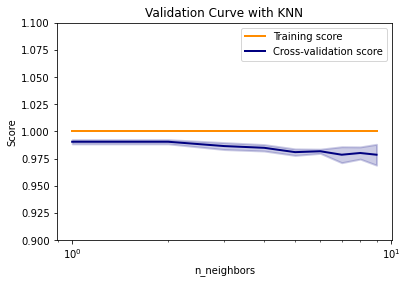

In [27]:
#Curva de validación con código entregado en el link del enunciado

from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range(1, 10)])

#Validation curve usando los mejores hiperparámetros 
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights = 'distance',metric = 'euclidean'), X_train, y_train, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.9, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Notamos que la curva de training se mantiene constante en 1, esto puede deberse simplemente a la naturaleza del modelo ya que basicamente lo que se está haciendo es que KNN se aprende demasiado bien el conjunto de datos a tal punto de que siempre acierta a la predicción.

Por otro lado notamos que la curva de cross validation, con respecto al score de Accuracy, luego de alcanzar su valor máximo empieza a decaer, lo que tiene mucho sentido debido a como funciona KNN. Con esto me refiero que a medida que acumento la cantidad de neighbors es mas probable que agrupe una mayor cantidad de datos errados con respecto a los que si son correctos. Por lo tanto a medida que aumentamos los neighbors existe tendencia a tener overfitting

## Curva AUC-ROC

In [28]:
#Determinamos la cantidad de neighbors necesarios

index = np.argmax(test_scores_mean)
param_range[index]

1

In [29]:
#Codigo sacado del link del enunciado

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    train_size=0.70,
                                                    random_state=1997)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

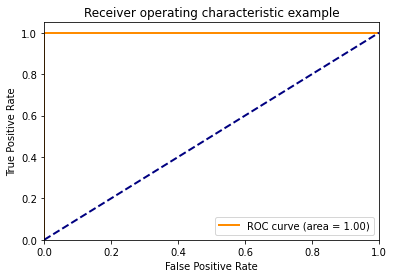

In [30]:
### plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\Nikolo\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


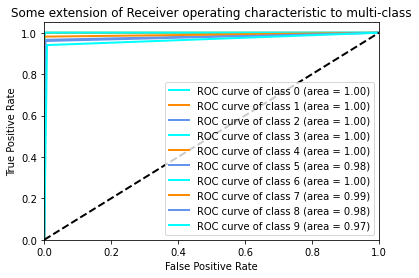

In [31]:
#AOC-ROC para multiples clases (código también obtenido del link)
import sys
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En este caso vemos que al igual que la curva anterior como el modelo predice tan bien el problema que la mayoria de los datos obtiene excelentes predicciones, sin embargo, otros se equivocan solo un poco, lo cual se puede deber a que entrena muy bien cierta clase mientras que otras las descuida solo un poco.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una reducción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


## Selección de atributos

In [32]:
x_training = digits.drop(columns="target").drop(['c00','c32','c39'], axis=1) #SE DROPEAN COLUMNAS ADICIONALES PUES TIENEN SOLO 0 EN SUS ENTRADAS LO QUE GENERA PROBLEMAS
y_training = digits["target"]

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['c10',
 'c13',
 'c20',
 'c21',
 'c26',
 'c28',
 'c30',
 'c33',
 'c34',
 'c36',
 'c42',
 'c43',
 'c46',
 'c60',
 'c61']

## Extracción de atributos

In [34]:
# ajustar modelo utilizando PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


x = StandardScaler().fit_transform(x_training)
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)


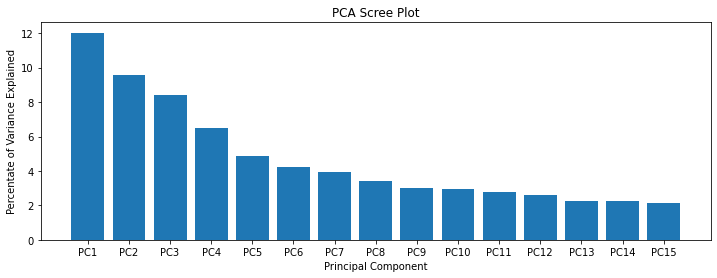

In [35]:
# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns=[]
for i in range(1, 16):
    if i == 1:
        columns.append(f'PC{i}')
    else:
        columns.append(f'PC{i}')
    columns

plt.figure(figsize=(12,4))
plt.bar(x= range(1,16), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

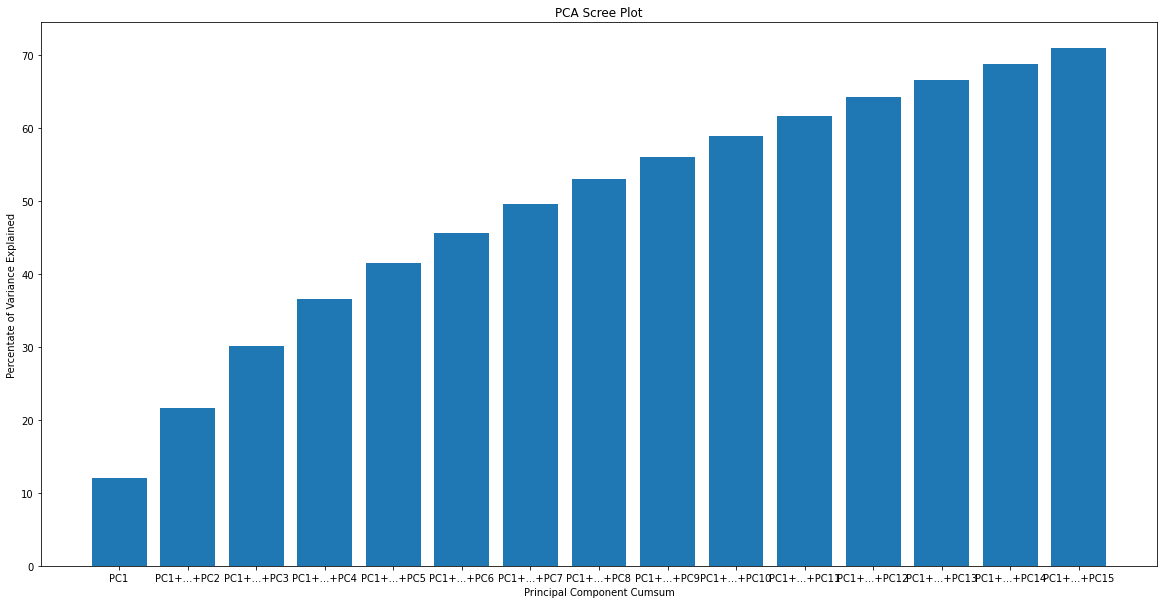

In [36]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = []
for i in range(1, 16):
    if i == 1:
        columns.append(f'PC{i}')
    else:
        columns.append(columns[0] + f'+...+PC{i}')
columns

plt.figure(figsize=(20,10))
plt.bar(x= range(1,16), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

## Respuestas

## Nuevo intervalo de confianza

Intervalo de confianza mediante la Selección de atributos

In [37]:
X_k = x_training[atributos]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_k, y_training, test_size=0.30, 
                                                train_size=0.70,
                                                random_state=1997)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
precision = cross_val_score(estimator=knn_gridsearchcv,
                        X=X_train2,
                        y=y_train2,
                        cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.98, 0.94, 0.95, 0.91, 0.97, 0.96, 0.97, 0.96, 0.93, 0.91] 
Precision promedio:  0.948 +/-  0.024


Intervalo de confianza con PCA

In [38]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(principalComponents, y_training, test_size=0.30, 
                                                train_size=0.70,
                                                random_state=1997)
classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
precision = cross_val_score(estimator=knn_gridsearchcv,
                        X=X_train3,
                        y=y_train3,
                        cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.96, 0.94, 0.98, 0.94, 0.98, 0.97, 0.96, 0.97, 0.96, 0.96] 
Precision promedio:  0.962 +/-  0.013


Podemos notar que los intervalos de confianza redujeron considerablemente el porcentaje de predicción, esto se atribuye a que como se tienen menor cantidad de datos el modelo no predice tan bien como en los casos anteriores, sin embargo, se cumple el objetivo de mejorar el tiempo de computo del algoritmo, bajando de alrededor de los 13 segundo a 4 y 3 segundos.

## Tiempo de ejecución

In [39]:
#Método K-Nearest Neighbours Seleccionando atributos

from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [3, 5, 11, 19],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)

start_time = time.time()#Cronometro

knn_grid_result = knn_gridsearchcv.fit(X_train2, y_train2)

print("--- %s segundos ---" % (time.time() - start_time))

--- 10.152404308319092 segundos ---


In [40]:
#Método K-Nearest Neighbours extrayendo atributos y usando PCA

from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

#Selección de hiperparámetros
metric_knn = {
          'n_neighbors' : [3, 5, 11, 19],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }

knn = KNeighborsClassifier()

knn_gridsearchcv = GridSearchCV(estimator = knn, param_grid = metric_knn, cv = 10)

start_time = time.time()#Cronometro

knn_grid_result = knn_gridsearchcv.fit(X_train3, y_train3)

print("--- %s segundos ---" % (time.time() - start_time))

--- 8.348847150802612 segundos ---


Vemos que el tiempo de ejecución se redujo notoriamente, esto ya que estamos trabajando con una menor cantidad de datos, basta observar la lista de atributos donde claramente se ven menos columnas

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [41]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = np.array(y_pred)[mask] #corregido

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    correccion = X_aux.shape[0] #corregido
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < correccion: #corregido
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
                ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()
    

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

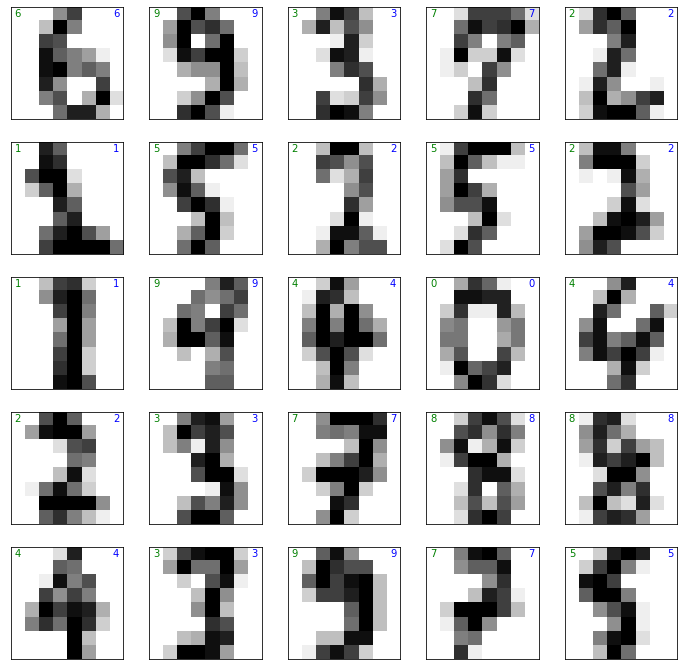

In [42]:
# Grafica de los valores correctos
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

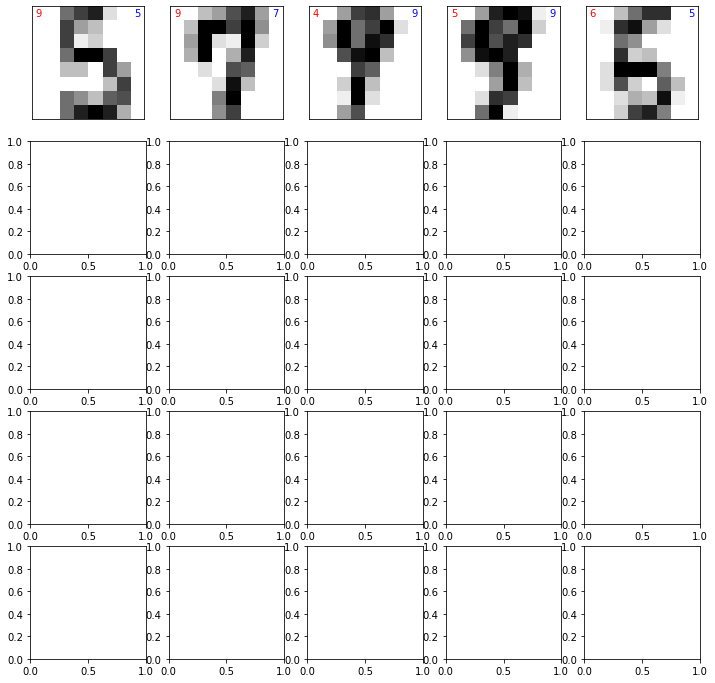

In [43]:
#Gráfico de los valores incorrectos
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "incorrectos")

El hecho de que el valor predicho y el original sean distintos pueden deberse a distintas circunstancias:

*  Primero notemos que los valores en que hubo error fueron en la gran mayoría el 4, 5, 6, 7 y 9, lo que en lo personal me hace mucho sentido ya que por ejemplo el 5 y 6 viendolo como pixeles, son muy parecidos y los colores no alcanzan a distinguir como "la parte redonda del 6". Lo mismo ocurre con los demás numeros.
* En general el modelo aproxima bastante bien, donde cada métrica aportaba valores superiores al 98% y de hecho notamos que la cantidad de valores incorrectos es muy pequeña, por lo cual se podría decir que las fallas se deben a ese 2% de valores que no fueron correctamente predichos


### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Una vez finalizado el trabajo se pueden extraer las siguientes conclusiones:

* Considero que KNN es un excelente modelo para este tipo de problemas ya que en todos los casos los resultados que se obtenian eran sumamente buenos y satisfactorios. De hecho esto se aprecia al momento de graficar los valores incorrectos donde solo mostró 5 datos errados de un total de 1700 datos aproximadamente.
* Respecto a las preguntas iniciales no comprendo a cuales preguntas se refiere la redacción de esta pregunta, si se refiere a las preguntas del ejercicio 1, fue posible mostrar con las celdas correspondientes lo pedido.
* Rescpecto a la visualización tuve bastantes problemas interpretando la curva de validación porque en un principio no me hacia sentido la forma que tenía, sin embargo, una vez que se pudo entender el funcionamiento de KNN se me hizo sumamente natural que los datos dieran los resultados que dieron.
* Dentro de lo que mas rescato de este trabajo fue la utilización de selección y extracción de atributos, ya que encontré bastante interesante el hecho de sacrificar un poco de fidelidad del modelo para obtener mejores tiempos de computo, ahora bien, con esto claramente se debe ser prudente, ya que en mi caso se obtuvieron buenos intervalos de confianza.
* En general la tarea la encontré de una dificultad un poco alta debido a que fue primera vez trabajando con algo asi. A diferencia de los laboratorios que eran mucho mas guiados aquí de todas formas había que indagar mucho mas.
* Agregar que consideré bastante desafiante la interpretación de los enunciados ya que a veces nisiquiera entendía que era lo que se me pedía, de hecho aún no estoy del todo seguro cual eran algunos objetivos o si respondí bien, pero como el profesor indicó que las respuestas quedaban a interpretación del estudiante, respondí lo que considere correcto.